In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats
plt.style.use('seaborn-whitegrid')

In [2]:
###reading data




In [3]:
df_recievable=pd.read_csv('WA_Fn-UseC_-Accounts-Receivable.csv')

In [4]:
df_recievable.head()

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate
0,391,0379-NEVHP,4/6/2013,611365,1/2/2013,2/1/2013,55.94,No,1/15/2013,Paper,13,0
1,406,8976-AMJEO,3/3/2012,7900770,1/26/2013,2/25/2013,61.74,Yes,3/3/2013,Electronic,36,6
2,391,2820-XGXSB,1/26/2012,9231909,7/3/2013,8/2/2013,65.88,No,7/8/2013,Electronic,5,0
3,406,9322-YCTQO,4/6/2012,9888306,2/10/2013,3/12/2013,105.92,No,3/17/2013,Electronic,35,5
4,818,6627-ELFBK,11/26/2012,15752855,10/25/2012,11/24/2012,72.27,Yes,11/28/2012,Paper,34,4


In [5]:
df_recievable.shape

(2466, 12)

In [6]:
df_recievable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   countryCode    2466 non-null   int64  
 1   customerID     2466 non-null   object 
 2   PaperlessDate  2466 non-null   object 
 3   invoiceNumber  2466 non-null   int64  
 4   InvoiceDate    2466 non-null   object 
 5   DueDate        2466 non-null   object 
 6   InvoiceAmount  2466 non-null   float64
 7   Disputed       2466 non-null   object 
 8   SettledDate    2466 non-null   object 
 9   PaperlessBill  2466 non-null   object 
 10  DaysToSettle   2466 non-null   int64  
 11  DaysLate       2466 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 231.3+ KB


In [7]:
df_recievable.isnull().sum()

countryCode      0
customerID       0
PaperlessDate    0
invoiceNumber    0
InvoiceDate      0
DueDate          0
InvoiceAmount    0
Disputed         0
SettledDate      0
PaperlessBill    0
DaysToSettle     0
DaysLate         0
dtype: int64

### PreProcessing

In [8]:
df_recievable.InvoiceDate=pd.to_datetime(df_recievable.InvoiceDate)

In [9]:
df_recievable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   countryCode    2466 non-null   int64         
 1   customerID     2466 non-null   object        
 2   PaperlessDate  2466 non-null   object        
 3   invoiceNumber  2466 non-null   int64         
 4   InvoiceDate    2466 non-null   datetime64[ns]
 5   DueDate        2466 non-null   object        
 6   InvoiceAmount  2466 non-null   float64       
 7   Disputed       2466 non-null   object        
 8   SettledDate    2466 non-null   object        
 9   PaperlessBill  2466 non-null   object        
 10  DaysToSettle   2466 non-null   int64         
 11  DaysLate       2466 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 231.3+ KB


In [10]:
df_recievable.SettledDate=pd.to_datetime(df_recievable.SettledDate)

In [11]:
df_recievable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   countryCode    2466 non-null   int64         
 1   customerID     2466 non-null   object        
 2   PaperlessDate  2466 non-null   object        
 3   invoiceNumber  2466 non-null   int64         
 4   InvoiceDate    2466 non-null   datetime64[ns]
 5   DueDate        2466 non-null   object        
 6   InvoiceAmount  2466 non-null   float64       
 7   Disputed       2466 non-null   object        
 8   SettledDate    2466 non-null   datetime64[ns]
 9   PaperlessBill  2466 non-null   object        
 10  DaysToSettle   2466 non-null   int64         
 11  DaysLate       2466 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(5)
memory usage: 231.3+ KB


In [12]:
df_recievable.DueDate=pd.to_datetime(df_recievable.DueDate)

In [13]:
df_recievable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   countryCode    2466 non-null   int64         
 1   customerID     2466 non-null   object        
 2   PaperlessDate  2466 non-null   object        
 3   invoiceNumber  2466 non-null   int64         
 4   InvoiceDate    2466 non-null   datetime64[ns]
 5   DueDate        2466 non-null   datetime64[ns]
 6   InvoiceAmount  2466 non-null   float64       
 7   Disputed       2466 non-null   object        
 8   SettledDate    2466 non-null   datetime64[ns]
 9   PaperlessBill  2466 non-null   object        
 10  DaysToSettle   2466 non-null   int64         
 11  DaysLate       2466 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(4), object(4)
memory usage: 231.3+ KB


In [14]:
df_recievable.head()

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate
0,391,0379-NEVHP,4/6/2013,611365,2013-01-02,2013-02-01,55.94,No,2013-01-15,Paper,13,0
1,406,8976-AMJEO,3/3/2012,7900770,2013-01-26,2013-02-25,61.74,Yes,2013-03-03,Electronic,36,6
2,391,2820-XGXSB,1/26/2012,9231909,2013-07-03,2013-08-02,65.88,No,2013-07-08,Electronic,5,0
3,406,9322-YCTQO,4/6/2012,9888306,2013-02-10,2013-03-12,105.92,No,2013-03-17,Electronic,35,5
4,818,6627-ELFBK,11/26/2012,15752855,2012-10-25,2012-11-24,72.27,Yes,2012-11-28,Paper,34,4


In [15]:
df_recievable['Late']=df_recievable['DaysLate'].apply(lambda x:1 if x>=1 else 0)

In [16]:
df_recievable

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,Late
0,391,0379-NEVHP,4/6/2013,611365,2013-01-02,2013-02-01,55.94,No,2013-01-15,Paper,13,0,0
1,406,8976-AMJEO,3/3/2012,7900770,2013-01-26,2013-02-25,61.74,Yes,2013-03-03,Electronic,36,6,1
2,391,2820-XGXSB,1/26/2012,9231909,2013-07-03,2013-08-02,65.88,No,2013-07-08,Electronic,5,0,0
3,406,9322-YCTQO,4/6/2012,9888306,2013-02-10,2013-03-12,105.92,No,2013-03-17,Electronic,35,5,1
4,818,6627-ELFBK,11/26/2012,15752855,2012-10-25,2012-11-24,72.27,Yes,2012-11-28,Paper,34,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,391,6708-DPYTF,8/2/2012,9982796720,2013-10-18,2013-11-17,79.61,No,2013-12-01,Electronic,44,14,1
2462,391,9841-XLGBV,1/3/2013,9983237240,2012-09-19,2012-10-19,38.25,No,2012-10-13,Paper,24,0,0
2463,770,7856-ODQFO,8/5/2012,9986249860,2012-07-02,2012-08-01,67.59,No,2012-07-27,Paper,25,0,0
2464,770,7050-KQLDO,9/29/2012,9989225541,2012-04-27,2012-05-27,53.16,No,2012-05-18,Paper,21,0,0


In [17]:
df_recievable.Late.value_counts()

0    1589
1     877
Name: Late, dtype: int64

In [18]:
df_recievable.invoiceNumber.shift()  ###how shift works




0                NaN
1       6.113650e+05
2       7.900770e+06
3       9.231909e+06
4       9.888306e+06
            ...     
2461    9.982124e+09
2462    9.982797e+09
2463    9.983237e+09
2464    9.986250e+09
2465    9.989226e+09
Name: invoiceNumber, Length: 2466, dtype: float64

In [19]:
df_recievable.invoiceNumber.shift(-1)

0       7.900770e+06
1       9.231909e+06
2       9.888306e+06
3       1.575286e+07
4       1.810452e+07
            ...     
2461    9.983237e+09
2462    9.986250e+09
2463    9.989226e+09
2464    9.990244e+09
2465             NaN
Name: invoiceNumber, Length: 2466, dtype: float64

In [20]:
df_recievable['Countlate']=df_recievable.Late.eq(1).groupby(df_recievable.customerID).apply(lambda x:x.cumsum().shift().fillna(0).astype(int))

In [21]:
df_recievable.Countlate.value_counts()

0     656
1     393
2     247
4     158
3     154
5     146
6      93
7      76
8      73
9      63
10     55
11     52
12     49
13     48
14     40
15     29
16     26
18     21
17     20
19     17
20     12
21     10
22      8
23      5
24      5
25      3
26      1
27      1
28      1
29      1
30      1
31      1
32      1
Name: Countlate, dtype: int64

In [22]:
df_recievable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   countryCode    2466 non-null   int64         
 1   customerID     2466 non-null   object        
 2   PaperlessDate  2466 non-null   object        
 3   invoiceNumber  2466 non-null   int64         
 4   InvoiceDate    2466 non-null   datetime64[ns]
 5   DueDate        2466 non-null   datetime64[ns]
 6   InvoiceAmount  2466 non-null   float64       
 7   Disputed       2466 non-null   object        
 8   SettledDate    2466 non-null   datetime64[ns]
 9   PaperlessBill  2466 non-null   object        
 10  DaysToSettle   2466 non-null   int64         
 11  DaysLate       2466 non-null   int64         
 12  Late           2466 non-null   int64         
 13  Countlate      2466 non-null   int32         
dtypes: datetime64[ns](3), float64(1), int32(1), int64(5), object(4)
memory u

In [23]:
df_recievable.describe()

,countryCode,invoiceNumber,InvoiceAmount,DaysToSettle,DaysLate,Late,Countlate
count,2466.000000,2.466000e+03,2466.000000,2466.00000,2466.000000,2466.000000,2466.000000
mean,620.446067,4.978431e+09,59.895856,26.44485,3.442417,0.355637,4.410787
std,215.933610,2.884272e+09,20.435838,12.33493,6.290607,0.478803,5.363647
min,391.000000,6.113650e+05,5.260000,0.00000,0.000000,0.000000,0.000000
25%,406.000000,2.528854e+09,46.400000,18.00000,0.000000,0.000000,0.000000
50%,770.000000,4.964228e+09,60.560000,26.00000,0.000000,0.000000,2.000000
75%,818.000000,7.494512e+09,73.765000,35.00000,5.000000,1.000000,7.000000
max,897.000000,9.990244e+09,128.280000,75.00000,45.000000,1.000000,32.000000


In [24]:
df_recievable.countryCode.unique()

array([391, 406, 818, 897, 770], dtype=int64)

In [25]:
df_recievable.countryCode.unique().size

5

<AxesSubplot:xlabel='countryCode', ylabel='DaysLate'>

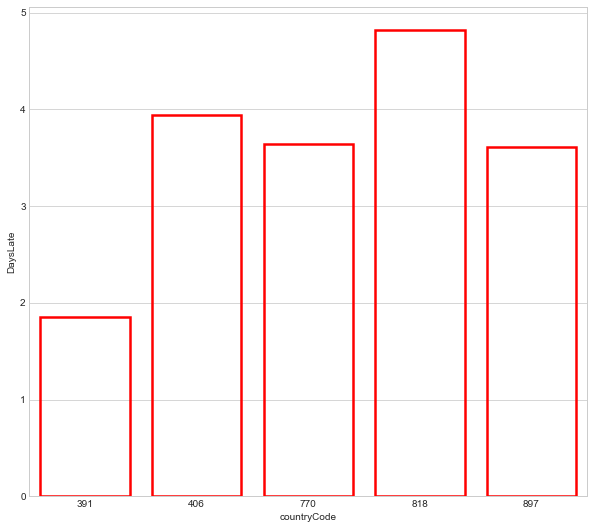

In [26]:
##plotting a bar plot to find the average dayslate of each country

temp=pd.DataFrame(df_recievable.groupby(['countryCode'],axis=0,as_index=False)['DaysLate'].mean())
plt.figure(figsize=(10,9))                                                          
sns.barplot(x='countryCode',y='DaysLate',data=temp,linewidth=2.5,facecolor=(1,1,1,0),errcolor='.4',edgecolor='red')

In [27]:
df_recievable.describe(include=np.object)

C:\Users\91974\AppData\Local\Temp/ipykernel_32428/216956070.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_recievable.describe(include=np.object)


,customerID,PaperlessDate,Disputed,PaperlessBill
count,2466,2466,2466,2466
unique,100,91,2,2
top,9149-MATVB,3/3/2012,No,Paper
freq,36,58,1905,1263


In [28]:
df_recievable.PaperlessBill.value_counts()

Paper         1263
Electronic    1203
Name: PaperlessBill, dtype: int64

In [29]:
###looking for customer wo is late to pay



In [30]:
df_recievable.customerID.unique()

array(['0379-NEVHP', '8976-AMJEO', '2820-XGXSB', '9322-YCTQO',
       '6627-ELFBK', '5148-SYKLB', '8690-EEBEO', '4460-ZXNDN',
       '3831-FXWYK', '7654-DOLHO', '3993-QUNVJ', '5284-DJOZO',
       '5924-UOPGH', '9117-LYRCE', '7695-NKUXM', '8820-BLYDZ',
       '3568-JJMFW', '5613-UHVMG', '6833-ETVHD', '7758-WKLVM',
       '6004-KITZM', '9841-XLGBV', '8156-PCYBM', '7946-HJDUR',
       '2621-XCLEH', '8887-NCUZC', '9286-VLKMI', '6160-HCSFI',
       '1080-NDGAE', '6296-UKEUZ', '6831-FIODB', '9174-IYKOC',
       '2676-DZINU', '9014-WENVB', '1447-YZKCL', '8364-UWVLM',
       '9323-NDIOV', '5920-DPXLN', '6708-DPYTF', '4632-QZOKX',
       '2125-HJDLA', '5592-UQXSS', '9725-EZTEJ', '6177-VTITE',
       '5529-TBPGK', '4640-FGEJI', '0688-XNJRO', '8389-TCXFQ',
       '3569-VJWXS', '7050-KQLDO', '4092-ZAVRG', '9928-IJYBQ',
       '6048-QPZCF', '1408-OQZUE', '7600-OISKG', '7856-ODQFO',
       '5196-TWQXF', '3448-OWJOT', '7841-HROAQ', '3271-HYHDN',
       '2447-JCFGW', '3598-DNURW', '9250-VHLWY', '8942-

In [31]:
customer_late=pd.crosstab(index=df_recievable['customerID'],columns=df_recievable['Late'])
customer_late.sort_values(by=[1],ascending=False)

Late,0,1
customerID,,
0688-XNJRO,2,32
8102-ABPKQ,1,26
8690-EEBEO,5,26
6708-DPYTF,5,25
4460-ZXNDN,3,25
...,...,...
6177-VTITE,21,0
6296-UKEUZ,19,0
6632-CGYHU,20,0


In [32]:
df_recievable.columns

Index(['countryCode', 'customerID', 'PaperlessDate', 'invoiceNumber',
       'InvoiceDate', 'DueDate', 'InvoiceAmount', 'Disputed', 'SettledDate',
       'PaperlessBill', 'DaysToSettle', 'DaysLate', 'Late', 'Countlate'],
      dtype='object')

In [33]:
df1=df_recievable[df_recievable['DaysLate']>0].copy()

In [34]:
df1

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,Late,Countlate
1,406,8976-AMJEO,3/3/2012,7900770,2013-01-26,2013-02-25,61.74,Yes,2013-03-03,Electronic,36,6,1,0
3,406,9322-YCTQO,4/6/2012,9888306,2013-02-10,2013-03-12,105.92,No,2013-03-17,Electronic,35,5,1,0
4,818,6627-ELFBK,11/26/2012,15752855,2012-10-25,2012-11-24,72.27,Yes,2012-11-28,Paper,34,4,1,0
8,770,3831-FXWYK,3/8/2013,28049695,2012-05-14,2012-06-13,80.07,Yes,2012-07-01,Paper,48,18,1,0
12,818,5924-UOPGH,6/6/2013,36620839,2013-05-08,2013-06-07,90.08,Yes,2013-06-09,Paper,32,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,897,3676-CQAIF,7/29/2013,9938923133,2012-01-15,2012-02-14,48.06,No,2012-02-22,Paper,38,8,1,14
2456,818,8102-ABPKQ,8/29/2013,9941572096,2012-11-18,2012-12-18,74.16,Yes,2013-01-02,Paper,45,15,1,25
2457,818,5924-UOPGH,6/6/2013,9947321662,2012-09-08,2012-10-08,93.09,Yes,2012-10-15,Paper,37,7,1,5
2460,818,5148-SYKLB,8/28/2013,9982124268,2012-09-21,2012-10-21,59.00,Yes,2012-10-28,Paper,37,7,1,12


In [35]:
df2=pd.DataFrame(df1.groupby(['customerID'],axis=0,as_index=False)['DaysLate'].count())  ##each  customer total dayslates  customer repeated

In [36]:
df2

,customerID,DaysLate
0,0379-NEVHP,1
1,0465-DTULQ,14
2,0625-TNJFG,5
3,0688-XNJRO,32
4,0706-NRGUP,10
...,...,...
78,9725-EZTEJ,13
79,9758-AIEIK,4
80,9841-XLGBV,2
81,9883-SDWFS,23


In [37]:
df2.columns=(['customerID','repeatcust'])

In [38]:
df2

,customerID,repeatcust
0,0379-NEVHP,1
1,0465-DTULQ,14
2,0625-TNJFG,5
3,0688-XNJRO,32
4,0706-NRGUP,10
...,...,...
78,9725-EZTEJ,13
79,9758-AIEIK,4
80,9841-XLGBV,2
81,9883-SDWFS,23


In [39]:
df3=pd.merge(df_recievable,df2,how='left',on='customerID')

In [40]:
df3

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,Late,Countlate,repeatcust
0,391,0379-NEVHP,4/6/2013,611365,2013-01-02,2013-02-01,55.94,No,2013-01-15,Paper,13,0,0,0,1.0
1,406,8976-AMJEO,3/3/2012,7900770,2013-01-26,2013-02-25,61.74,Yes,2013-03-03,Electronic,36,6,1,0,5.0
2,391,2820-XGXSB,1/26/2012,9231909,2013-07-03,2013-08-02,65.88,No,2013-07-08,Electronic,5,0,0,0,NaN
3,406,9322-YCTQO,4/6/2012,9888306,2013-02-10,2013-03-12,105.92,No,2013-03-17,Electronic,35,5,1,0,17.0
4,818,6627-ELFBK,11/26/2012,15752855,2012-10-25,2012-11-24,72.27,Yes,2012-11-28,Paper,34,4,1,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,391,6708-DPYTF,8/2/2012,9982796720,2013-10-18,2013-11-17,79.61,No,2013-12-01,Electronic,44,14,1,24,25.0
2462,391,9841-XLGBV,1/3/2013,9983237240,2012-09-19,2012-10-19,38.25,No,2012-10-13,Paper,24,0,0,2,2.0
2463,770,7856-ODQFO,8/5/2012,9986249860,2012-07-02,2012-08-01,67.59,No,2012-07-27,Paper,25,0,0,7,7.0
2464,770,7050-KQLDO,9/29/2012,9989225541,2012-04-27,2012-05-27,53.16,No,2012-05-18,Paper,21,0,0,5,5.0


In [41]:
df3['repeatcust'].fillna(0,inplace=True)

In [42]:
df3.shape

(2466, 15)

In [43]:
df_recievable.shape

(2466, 14)

In [44]:
df_recievable=df3

In [45]:
df_recievable.shape

(2466, 15)

In [46]:
temp.head()

,countryCode,DaysLate
0,391,1.853896
1,406,3.941176
2,770,3.642292
3,818,4.816537
4,897,3.608586


<AxesSubplot:xlabel='repeatcust', ylabel='DaysLate'>

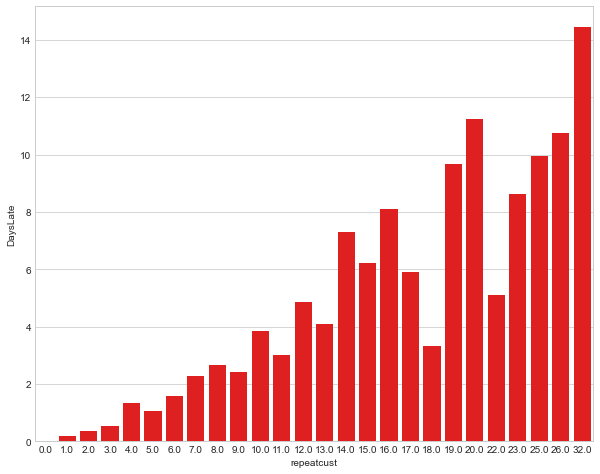

In [47]:
temp=pd.DataFrame(df_recievable.groupby(['repeatcust'],axis=0,as_index=False)['DaysLate'].mean())
plt.figure(figsize=(10,8))
sns.barplot(x='repeatcust',y='DaysLate',data=temp,color='red')

In [48]:
df_recievable.head()

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,Late,Countlate,repeatcust
0,391,0379-NEVHP,4/6/2013,611365,2013-01-02,2013-02-01,55.94,No,2013-01-15,Paper,13,0,0,0,1.0
1,406,8976-AMJEO,3/3/2012,7900770,2013-01-26,2013-02-25,61.74,Yes,2013-03-03,Electronic,36,6,1,0,5.0
2,391,2820-XGXSB,1/26/2012,9231909,2013-07-03,2013-08-02,65.88,No,2013-07-08,Electronic,5,0,0,0,0.0
3,406,9322-YCTQO,4/6/2012,9888306,2013-02-10,2013-03-12,105.92,No,2013-03-17,Electronic,35,5,1,0,17.0
4,818,6627-ELFBK,11/26/2012,15752855,2012-10-25,2012-11-24,72.27,Yes,2012-11-28,Paper,34,4,1,0,9.0


In [49]:
##category by invoice amount above 60 and below 60





In [50]:
def func_IA(x):
    if x>60: return 'b.more than60'
    else: return 'a.less than 60'
df_recievable['InvoiceAmount_bin']=df_recievable['InvoiceAmount'].apply(func_IA)

In [51]:
df_recievable.InvoiceAmount_bin.value_counts()

b.more than60     1260
a.less than 60    1206
Name: InvoiceAmount_bin, dtype: int64

<AxesSubplot:xlabel='InvoiceAmount_bin', ylabel='DaysLate'>

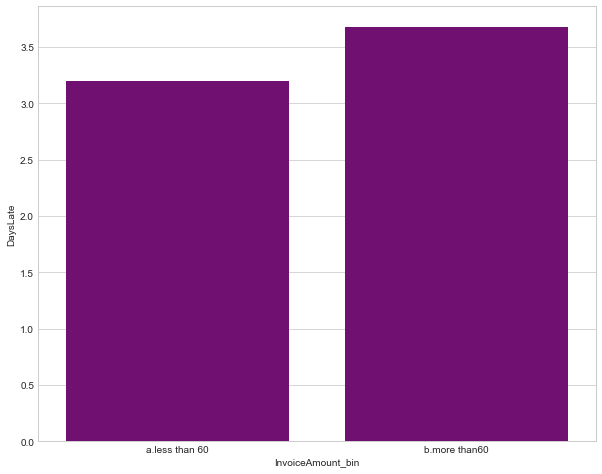

In [52]:
temp=pd.DataFrame(df_recievable.groupby(['InvoiceAmount_bin'],axis=0,as_index=False)['DaysLate'].mean())
plt.figure(figsize=(10,8))
sns.barplot(x='InvoiceAmount_bin',y='DaysLate',data=temp,color='purple')

In [53]:
df_recievable.columns

Index(['countryCode', 'customerID', 'PaperlessDate', 'invoiceNumber',
       'InvoiceDate', 'DueDate', 'InvoiceAmount', 'Disputed', 'SettledDate',
       'PaperlessBill', 'DaysToSettle', 'DaysLate', 'Late', 'Countlate',
       'repeatcust', 'InvoiceAmount_bin'],
      dtype='object')

In [54]:
df_recievable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2466 entries, 0 to 2465
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   countryCode        2466 non-null   int64         
 1   customerID         2466 non-null   object        
 2   PaperlessDate      2466 non-null   object        
 3   invoiceNumber      2466 non-null   int64         
 4   InvoiceDate        2466 non-null   datetime64[ns]
 5   DueDate            2466 non-null   datetime64[ns]
 6   InvoiceAmount      2466 non-null   float64       
 7   Disputed           2466 non-null   object        
 8   SettledDate        2466 non-null   datetime64[ns]
 9   PaperlessBill      2466 non-null   object        
 10  DaysToSettle       2466 non-null   int64         
 11  DaysLate           2466 non-null   int64         
 12  Late               2466 non-null   int64         
 13  Countlate          2466 non-null   int32         
 14  repeatcu

In [55]:
df_recievable['Disputed']=df_recievable['Disputed'].map({'No':0,'Yes':1})
df_recievable['PaperlessBill']=df_recievable['PaperlessBill'].map({'Paper':0,'Electronic':1})

In [56]:
df_recievable['InvoiceQuarter']=df_recievable['InvoiceDate'].dt.quarter

In [57]:
df_recievable.head()

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,Late,Countlate,repeatcust,InvoiceAmount_bin,InvoiceQuarter
0,391,0379-NEVHP,4/6/2013,611365,2013-01-02,2013-02-01,55.94,0,2013-01-15,0,13,0,0,0,1.0,a.less than 60,1
1,406,8976-AMJEO,3/3/2012,7900770,2013-01-26,2013-02-25,61.74,1,2013-03-03,1,36,6,1,0,5.0,b.more than60,1
2,391,2820-XGXSB,1/26/2012,9231909,2013-07-03,2013-08-02,65.88,0,2013-07-08,1,5,0,0,0,0.0,b.more than60,3
3,406,9322-YCTQO,4/6/2012,9888306,2013-02-10,2013-03-12,105.92,0,2013-03-17,1,35,5,1,0,17.0,b.more than60,1
4,818,6627-ELFBK,11/26/2012,15752855,2012-10-25,2012-11-24,72.27,1,2012-11-28,0,34,4,1,0,9.0,b.more than60,4


In [58]:
###check relation with Late feature



C:\Users\91974\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='countryCode', ylabel='count'>

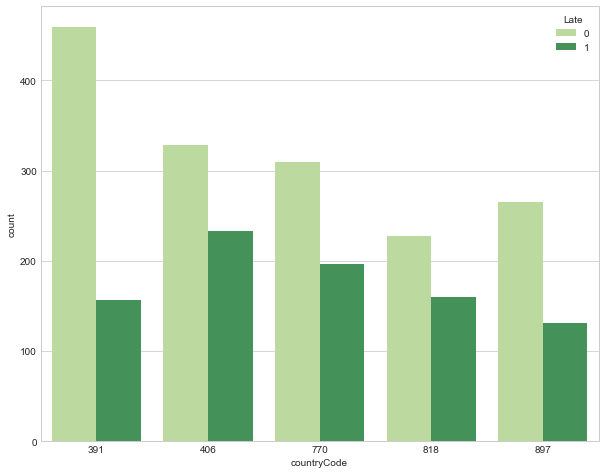

In [63]:
plt.figure(figsize=(10,8))
sns.countplot(df_recievable['countryCode'],hue=df_recievable['Late'],palette='YlGn')

C:\Users\91974\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Disputed', ylabel='count'>

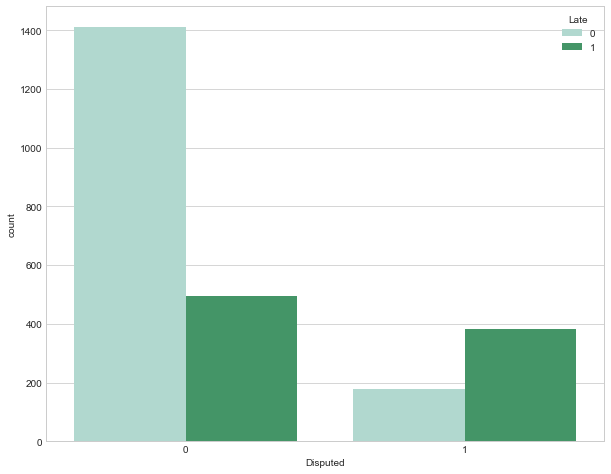

In [65]:
plt.figure(figsize=(10,8))
sns.countplot(df_recievable['Disputed'],hue=df_recievable['Late'],palette='BuGn')

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

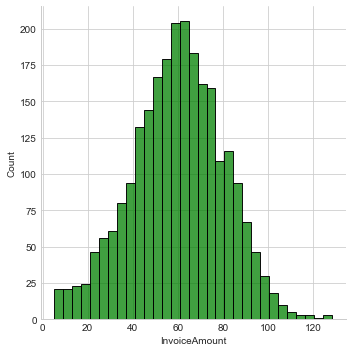

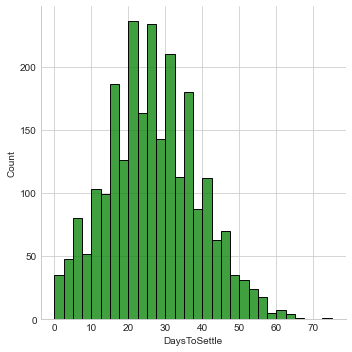

In [67]:
plt.figure(figsize=(10,8))
plt.figure(1)
sns.displot(df_recievable['InvoiceAmount'],color='green')

plt.figure(figsize=(10,8))
plt.figure(2)
sns.displot(df_recievable['DaysToSettle'],color='green')